In [1]:
import pandas as pd
data= pd.read_csv("TrainingDataCifar10ResnetSize200.csv")
data_test=pd.read_csv("TestingDataCifar10ResnetSize200.csv")

# Classifier

In [2]:
#github
classLabel = "Class Label"

X = data.drop(classLabel,axis = 1).values
Y = data[classLabel].values

X_t= data_test.drop(classLabel,axis = 1).values
y_test= data_test[classLabel].values

In [3]:
Features = data.drop(classLabel,axis = 1).columns.values
#features=list(Features.columns.values)
print(Features)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99'
 '100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111'
 '112' '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123'
 '124' '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135'
 '136' '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147'
 '148' '149' '150' '151' '152' '153' '154' '155' '156' '157' '158' '159'
 '160' '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171'
 '172' '173' '174' '175' '176' '177' '178' '179' '180' '181' '182

In [4]:
from sklearn.preprocessing import LabelBinarizer
#custom code
Y_train=LabelBinarizer().fit_transform(Y)
Y_test=LabelBinarizer().fit_transform(y_test)

In [5]:
pip install sklearn

You should consider upgrading via the 'C:\Users\jowens\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=7dbc2812cce9de8ce038459c4564dbfc73f8d36e99090e5b11ab9270ac864eb1
  Stored in directory: c:\users\jowens\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [9]:
pip install scikit-XCS

You should consider upgrading via the 'C:\Users\jowens\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Created wheel for scikit-XCS: filename=scikit_XCS-1.0.7-py3-none-any.whl size=35944 sha256=1db61ddb68f240cdf36bbf96ed6272a81994c593034123da0e0427f025681cd0
  Stored in directory: c:\users\jowens\appdata\local\pip\cache\wheels\2f\bf\9d\00aa286aeacb5ea765fc79dc7d13c3aa471a0b31dc6821f8f8
Successfully built scikit-XCS


In [6]:
from skXCS import XCS
model = XCS(N=10000, learning_iterations = 50000,nu = 10)
trainedModel = model.fit(X,Y)

# Rule Data

In [7]:
trainedModel.export_iteration_tracking_data("iterationData_fashionmnist_Resnet_200_XCS.csv")

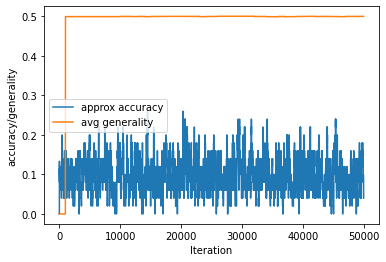

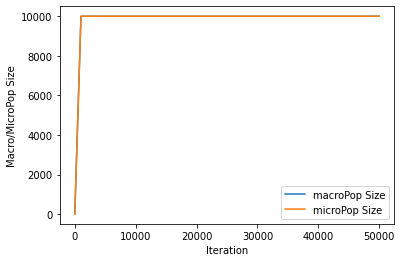

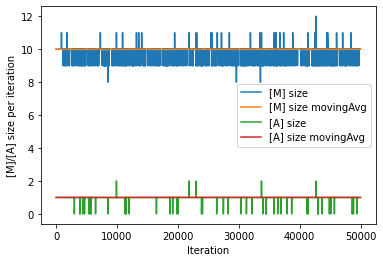

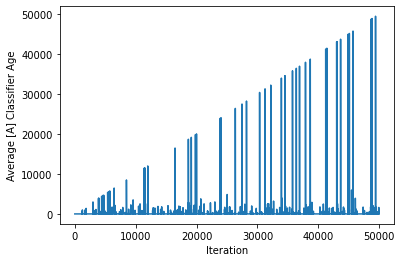

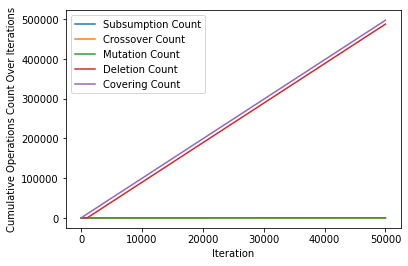

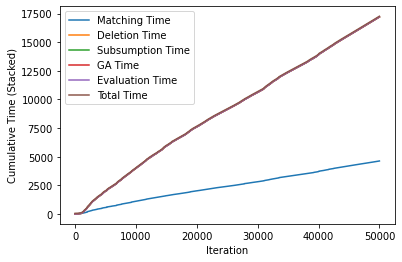

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_fashionmnist_Resnet_200_XCS.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
aSize = dataTracking["Action Set Size"].values
experience = dataTracking["Average Iteration Age of Action Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total GA Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,aSize,label="[A] size")
plt.plot(iterations,movingAvg(aSize),label="[A] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[A] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [A] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="GA Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [9]:
trainedModel.export_final_rule_population("RulePopulationfashionmnistResnet200_XCS.csv",Features,classLabel)

populationData2 = pd.read_csv("RulePopulationfashionmnistResnet200_XCS.csv")
display(populationData2)

,0,1,2,3,4,5,6,7,8,9,...,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"-2.85057131,0.56398291","-2.234197606,-0.40294839399999993",#,"-1.0539203700000002,1.75363485","-0.6697521774999997,3.3346215775","-2.4716668019999997,-0.22263739800000004",#,"-2.31507156,0.20837176000000013",#,"-0.9108902,1.05402274",...,0.0,1.0,1,1.0,40066,40066,0.470,0.0001,0,1
1,"-3.2527759840000003,0.38941518399999997","-1.5947622840000002,1.59818506",#,"-0.7067012499999998,3.2662542500000002","-1.6414702575000002,1.4852325375000002","-3.532939019,-0.909071381",#,#,"0.3390041699999997,3.9120798299999997",#,...,0.0,1.0,1,1.0,40292,40292,0.515,0.0001,0,1
2,#,#,#,"-0.3630823299999997,2.76230933","0.24770713499999997,2.3321756650000003",#,#,"-1.2764750155000004,2.3194317155000004","-0.15128836800000012,1.667731968",#,...,0.0,1.0,1,1.0,41289,41289,0.560,0.0001,0,1
3,"-1.9274386295000001,0.7472955095000001","-0.62943786,1.2487664600000001",#,"-1.6137527,1.98839362",#,"-1.4256404480000002,2.5726340480000003","-1.46024508,1.855407",#,#,"-0.7249478675000003,3.0411352675000005",...,0.0,1.0,1,1.0,41892,41892,0.470,0.0001,0,1
4,#,"-0.49064842399999997,0.964959924",#,"0.2988933600000001,3.58320324",#,#,#,#,"-0.26170367399999994,1.622281674",#,...,0.0,1.0,1,1.0,42105,42105,0.480,0.0001,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,#,"-2.128413738,0.07847633799999998","-1.3720475104999998,1.9910411505","0.21341044999999992,1.64367443","-1.8202932299999999,1.90980835",#,"-0.926156666,1.5053215260000001",#,#,"-0.40025278500000017,2.110469305",...,0.0,1.0,1,1.0,49999,49999,0.470,0.0001,0,1
9996,#,#,"-1.2066497075,1.8256433475000002",#,#,#,#,"-0.45075363150000003,3.3974974315","-0.9744646020000001,3.378191202",#,...,0.0,1.0,1,1.0,49999,49999,0.460,0.0001,0,1
9997,#,"-2.7388301420000003,0.688892742",#,#,"-0.668350095,0.7578652149999999",#,"-1.534026214,2.113191074","0.27473632299999995,2.672007477",#,#,...,0.0,1.0,1,1.0,49999,49999,0.505,0.0001,0,1
9998,#,"-1.870160644,-0.1797767560000001","-1.2617823085000004,1.8807759485000002",#,"-0.7232045300000001,0.81271965",#,"-1.257721874,1.8368867340000001","-0.6084688390000004,3.5552126390000005","0.19490561400000006,2.208820986",#,...,0.0,1.0,1,1.0,49999,49999,0.430,0.0001,0,1


In [10]:
trainedModel.export_final_rule_population_DCAL("RulePopulationfashionmnistResnet2002_XCS.csv",Features,classLabel)

populationData3 = pd.read_csv("RulePopulationfashionmnistResnet2002_XCS.csv")
display(populationData3)

,Specified Values,Specified Attribute Names,Class Label,Fitness,Prediction,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"[-2.85057131,0.56398291], [-2.234197606,-0.402...","0, 1, 3, 4, 5, 7, 9, 10, 12, 15, 16, 21, 28, 3...",4,0.010,10.0,0.0,1.0,1,1.0,40066,40066,0.470,0.0001,0,1
1,"[-3.2527759840000003,0.38941518399999997], [-1...","0, 1, 3, 4, 5, 8, 12, 14, 15, 16, 17, 19, 21, ...",9,0.010,10.0,0.0,1.0,1,1.0,40292,40292,0.515,0.0001,0,1
2,"[-0.3630823299999997,2.76230933], [0.247707134...","3, 4, 7, 8, 11, 12, 14, 17, 19, 20, 22, 24, 25...",0,0.010,10.0,0.0,1.0,1,1.0,41289,41289,0.560,0.0001,0,1
3,"[-1.9274386295000001,0.7472955095000001], [-0....","0, 1, 3, 5, 6, 9, 10, 11, 12, 15, 16, 18, 19, ...",3,0.010,10.0,0.0,1.0,1,1.0,41892,41892,0.470,0.0001,0,1
4,"[-0.49064842399999997,0.964959924], [0.2988933...","1, 3, 8, 13, 16, 17, 18, 22, 24, 28, 32, 34, 3...",3,0.208,0.0,0.0,1.0,1,1.0,42105,42105,0.480,0.0001,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"[-2.128413738,0.07847633799999998], [-1.372047...","1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 17, 19, ...",5,0.010,10.0,0.0,1.0,1,1.0,49999,49999,0.470,0.0001,0,1
9996,"[-1.2066497075,1.8256433475000002], [-0.450753...","2, 7, 8, 19, 21, 22, 23, 24, 26, 28, 30, 31, 3...",4,0.010,10.0,0.0,1.0,1,1.0,49999,49999,0.460,0.0001,0,1
9997,"[-2.7388301420000003,0.688892742], [-0.6683500...","1, 4, 6, 7, 12, 13, 17, 18, 19, 20, 21, 22, 23...",2,0.010,10.0,0.0,1.0,1,1.0,49999,49999,0.505,0.0001,0,1
9998,"[-1.870160644,-0.1797767560000001], [-1.261782...","1, 2, 4, 6, 7, 8, 11, 15, 17, 25, 26, 27, 34, ...",7,0.010,10.0,0.0,1.0,1,1.0,49999,49999,0.430,0.0001,0,1


# ROC and PRC Curves

## 0-49

### ROC and PRC Curves 0-9 

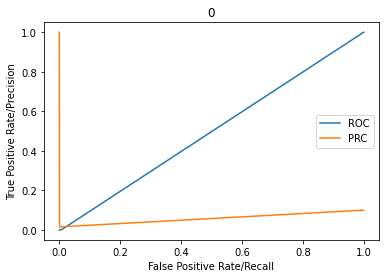

PRC AUC:0.058143089960886574
ROC AUC:0.4969447777777778


In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(X_t)
fpr1, tpr1, thresholds1 = roc_curve(Y_test[:,0], probs[:,0])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test[:,0], probs[:,0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

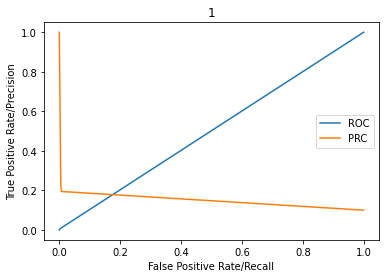

PRC AUC:0.14965841858482523
ROC AUC:0.5018901666666666


In [12]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(Y_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('1')
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

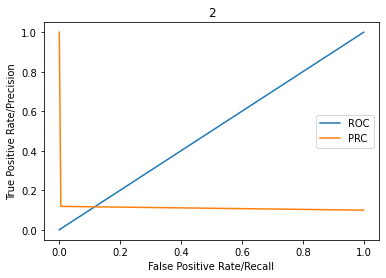

PRC AUC:0.1118234126984127
ROC AUC:0.500446111111111


In [13]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(Y_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('2')
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

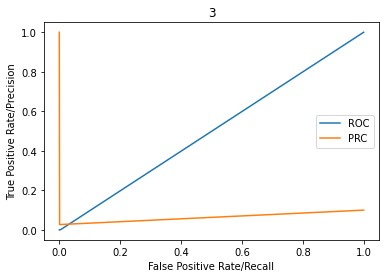

PRC AUC:0.06396724137931036
ROC AUC:0.4985004444444444


In [14]:
fpr4, tpr4, thresholds4 = roc_curve(Y_test[:,3], probs[:, 3])
prec4, recall4, thresholds4 = precision_recall_curve(Y_test[:,3], probs[:, 3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('3')
plt.show()

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

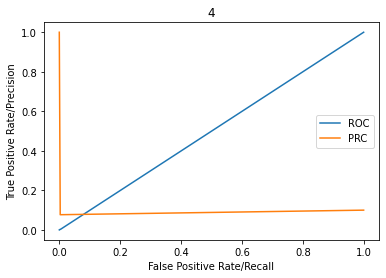

PRC AUC:0.08984131513647643
ROC AUC:0.4995013333333333


In [15]:
fpr5, tpr5, thresholds5 = roc_curve(Y_test[:,4], probs[:, 4])
prec5, recall5, thresholds5 = precision_recall_curve(Y_test[:,4], probs[:, 4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('4')
plt.show()

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

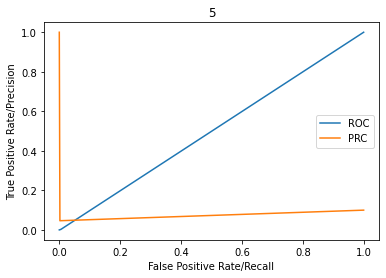

PRC AUC:0.07416485788113696
ROC AUC:0.498723


In [16]:
fpr6, tpr6, thresholds6 = roc_curve(Y_test[:,5], probs[:, 5])
prec6, recall6, thresholds6 = precision_recall_curve(Y_test[:,5], probs[:, 5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('5')
plt.show()

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

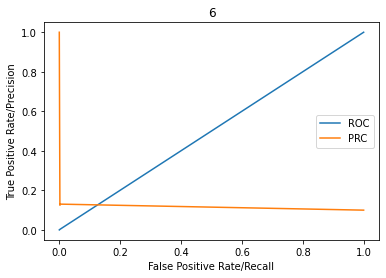

PRC AUC:0.11612445652173914
ROC AUC:0.5003887777777778


In [17]:
fpr7, tpr7, thresholds7 = roc_curve(Y_test[:,6], probs[:, 6])
prec7, recall7, thresholds7 = precision_recall_curve(Y_test[:,6], probs[:, 6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('6')
plt.show()

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

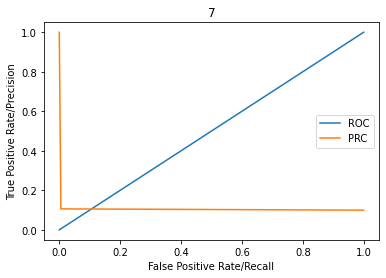

PRC AUC:0.10552275413711586
ROC AUC:0.5001697222222221


In [18]:
fpr8, tpr8, thresholds8 = roc_curve(Y_test[:,7], probs[:, 7])
prec8, recall8, thresholds8 = precision_recall_curve(Y_test[:,7], probs[:, 7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('7')
plt.show()

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

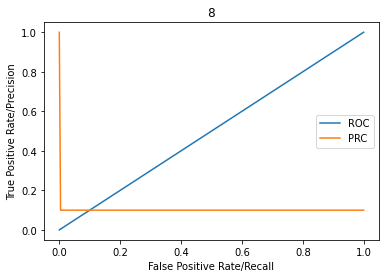

PRC AUC:0.10185000000000001
ROC AUC:0.5000017777777778


In [19]:
fpr9, tpr9, thresholds9 = roc_curve(Y_test[:,8], probs[:, 8])
prec9, recall9, thresholds9 = precision_recall_curve(Y_test[:,8], probs[:, 8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('8')
plt.show()

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

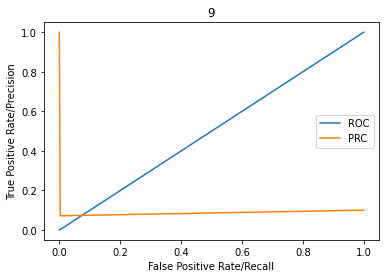

PRC AUC:0.08709350649350649
ROC AUC:0.4993348333333333


In [20]:
fpr10, tpr10, thresholds10 = roc_curve(Y_test[:,9], probs[:, 9])
prec10, recall10, thresholds10 = precision_recall_curve(Y_test[:,9], probs[:, 9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('9')
plt.show()

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))